C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


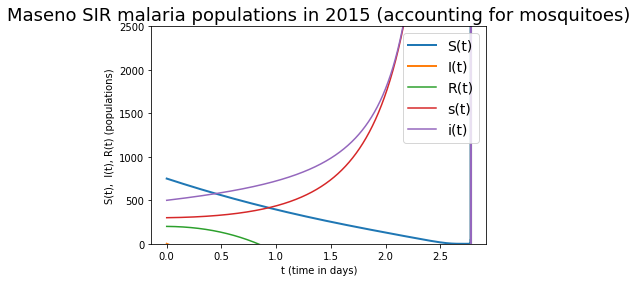

Fig 1.
The relationship between S(t), I(t), and R(t) popluation changes for malaria in Maseno, over time. 
This incorporates the fluctuation in mosquito population per the seasons, which affects the human infection rate.


In [2]:
#optional super challenge
#Eulers method

import numpy as np
#Setting the population size


t0 = 0 # Initial time
t_end = 365 # End time

h = .0001 # Step size
steps = int((t_end - t0)/h + 1) # number of steps

t = np.linspace(t0, t_end, steps) # storing t values
S = np.zeros(steps) # for storing S values
I = np.zeros(steps) # for storing I values
R = np.zeros(steps) # for storing R values
s = np.zeros(steps) #For starting mosquito population values
i = np.zeros(steps) #for starting infected anopheles mosquito values


a=0.05
p=0.25
m=0.001
ph=0.01
y=0.9

b = 0.001 # Infection rate
k = 0.9  # Removed rate (Death and recovery rate)


 

def dSdt(t,S,i):
    #this is the function that models the susceptible population against time
    return p-(b * S * i)-(a*S)

def dIdt(t,S,i,I):
    #this is the function that models the infected population against time
    return (b*S*i)+(m-ph-y-a)*I
def dRdt(t, I,R):
    #this is the function that models the removed population against time
    return (y*I)-(a*R)

def dsvdt(t,s,I):
    return p-((b*s*I)-(a*s))

def divdt(t,s,I,i):
    return(b*s*I)-(a*i)
     

# Setting the initial conditions as ratios of the actual values so as to have a readable plot
S[0] = 750 
I[0] = 0 
R[0] = 200
s[0] = 300
i[0] = 500


for n in range(steps-1): # Sets the range of iterations based on the number of steps that were initially calculated
    S[n+1] = S[n] + h * dSdt(t[n],S[n],i[n]) 
    I[n+1] = I[n] + h * dIdt(t[n],S[n],I[n],i[n]) 
    R[n+1] = R[n] + h * dRdt(t[n],I[n], R[n])
    
    s[n+1] = s[n] + h * dsvdt(t[n],s[n],I[n])
    i[n+1] = i[n] + h * divdt(t[n],s[n],i[n],I[n])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

#Sets the font size
plt.rcParams.update({'font.size': 15})

#sets th figure size
plt.rcParams["figure.figsize"] = [8,5]

#Plots the susceptible population against time
plt.plot(t,S,linewidth=2,label='S(t)')

#Plots the infected population against time
plt.plot(t,I,linewidth=2,label='I(t)')

#Plots the removed population against time
plt.plot(t,R,label='R(t)')


plt.plot(t,s, label="s(t)")
plt.plot(t,i,label="i(t)")
plt.title("Maseno SIR malaria populations in 2015 (accounting for mosquitoes)")
#labeling the axes
plt.xlabel('t (time in days)')
plt.ylabel("S(t),  I(t), R(t) (populations)")

#Displaying the legend
plt.legend(loc="upper right",prop={'size': 14})
ax.set_ylim([0, 2500])
plt.show()
print('Fig 1.\nThe relationship between S(t), I(t), and R(t) popluation changes for malaria in Maseno, over time. \nThis incorporates the fluctuation in mosquito population per the seasons, which affects the human infection rate.')